## Importación de librerias

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 

## Preparación del dataframe de trabajo

In [ ]:
datos_original= pd.read_csv('SPY.csv', sep=';')

# Selecciona una fila cada 5 filas
datos_reducido = datos_original.iloc[::5]

# Cambio el tipo de datos de timestamp a datetime
datos_reducido.loc[:, 'timestamp'] = pd.to_datetime(datos_reducido['timestamp'],dayfirst=True)
datos_reducido.info()
print(datos_reducido.head(5))
# ordenar el dataframe por timestamp
datos = datos_reducido.sort_values(by='timestamp')

# Cambiar el nombre de timestamp
datos.rename(columns={'timestamp': 'fecha'}, inplace=True)
# Quitar columnas innecesarias
datos.drop(columns=['open','high','low','close','volume'],inplace=True)


In [ ]:
datos.info()
datos

# Visualización de datos

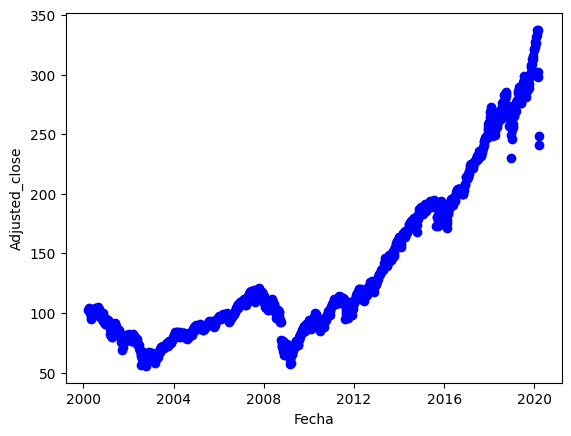

In [38]:
plt.ylabel("Adjusted_close")
plt.xlabel("Fecha")
plt.scatter(datos["fecha"], datos["adjusted_close"], color="blue")